**Data discovery using FITS (FIeld Time Series) database - for sites**

In this notebook we will look at discovering what data exists for a site in the FITS (FIeld Time Series) database. Again some functionality from previous notebooks in this series will be imported as functions.

To begin we will create a list of all the different data types available in the FITS database:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

# Create list of all typeIDs available in the FITS database

all_type_URL = 'https://fits.geonet.org.nz/type'

all_types = pd.read_json(all_type_URL).iloc[:,0]

all_typeIDs= []

for row in all_types:
    
    all_typeIDs.append(row['typeID'])

Now we will specify the site(s) we want to query for available data types.

In [2]:
# Specify site(s) to get data for

sites = ['RU001', 'WI222']

The next code segment will query the FITS database for data of all types at the given site(s). The output will be a list of data types available at the site(s) specified.

In [3]:
# Ensure list format to sites

if type(sites) != list:
    
    site = sites
    sites = []
    sites.append(site)
    
# Prepare data lists

site_data = [[] for j in range(len(sites))]

site_data_types = [[] for j in range(len(sites))]

# Load data from FITS database and parse into data lists

for j in range(len(sites)):
    
    for i in range(len(all_typeIDs)):
        
        # Build query for site, typeID combination
        
        query_suffix = 'siteID=%s&typeID=%s' % (sites[j], all_typeIDs[i])
        
        URL = 'https://fits.geonet.org.nz/observation?' + query_suffix
        
        # Try to load data of the given typeID for the site, if it fails then the data doesn't exist
        
        try:
            
            data = pd.read_csv(URL, names=['date-time', all_typeIDs[i], 'error'], header=0, parse_dates=[0], index_col=0)
            
            if len(data.values) > 1:
                
                site_data[j].append(data)
            
                site_data_types[j].append(all_typeIDs[i])
            
        except:
            
            pass

# Return information to the operator
    
for i in range(len(site_data_types)):
    
    print('Data types available for ' + sites[i] + ':\n')
    
    for j in range(len(site_data_types[i])):
        
        print(site_data_types[i][j])
        
    print('\n')

Data types available for RU001:

t
fr
ph
Cl
Mg
Li-w
Na-w
K-w
Ca-w
SiO2-w
H2S-w
Fe-w
Al-w
As-w
Rb-w
Cs-w
NH3-w
B-w
F-w
Br-w
NO3-N-w
PO4-P-w
z
SO4-w
d18O-w
d2H-w
Mg-w
Cl-w


Data types available for WI222:

t
ph
Li-w
Na-w
K-w
Ca-w
SiO2-w
H2S-w
Fe-w
Al-w
As-w
NH3-w
B-w
F-w
Br-w
NO3-N-w
PO4-P-w
SO4-w
d18O-w
d2H-w
Mg-w
Cl-w




While a list of available data types is useful, we need a fast way to view data of a given type and decide if it's what we want. The next code segment deals with plotting some data for each site. As there is a limit to how much data can be displayed on a plot, we will specify which data types we want to display for the site(s). Up to 9 data types can be specified.

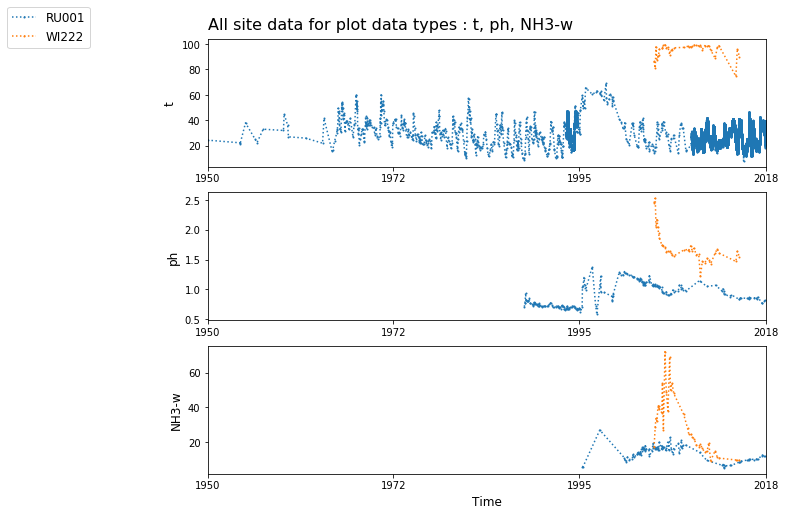

In [4]:
plot_data_types = ['t', 'ph', 'NH3-w']

# Determine number and arrangement of subplots (max 9, less for greater legibility)

subplot_number = len(plot_data_types)

if subplot_number / 3 > 1: # if there are more than 3 subplots

    rows = '3'

    if subplot_number / 6 > 1: # if there are more than 6 subplots

        cols = '3'

    else:

        cols = '2'

else:

    rows = str(subplot_number)
    cols = '1'  

ax = [[] for i in range(len(plot_data_types))]
    
# Plot data

plt.figure(figsize = (10,8))

for i in range(len(site_data)): # i is site index

    for j in range(len(plot_data_types)): # j is data type index
        
        k = site_data_types[i].index(plot_data_types[j]) # match data type chosen to position in data list
        
        if i == 0:
        
            ax[j] = plt.subplot(int(rows + cols + str(j + 1)))
            
        if ((i == 0) and (j == 0)):
            
            # Set initial min/max times
            
            minmintime = min(site_data[i][k].index.values)
            maxmaxtime = max(site_data[i][k].index.values)

        # Do not plot empty DataFrames (and avoid cluttering the figure legend)

        if len(site_data[i][k].values) < 1:

            continue

        try:
            
            ax[j].plot(site_data[i][k].loc[:, plot_data_types[j]], label = sites[i],
                      marker='o', linestyle=':', markersize = 1)
            
        except:

            continue
            
        # Get min, max times of dataset

        mintime = min(site_data[i][k].index.values)
        maxtime = max(site_data[i][k].index.values)
            
        # Set y label

        ax[j].set_ylabel(plot_data_types[j], rotation = 90, labelpad = 5, fontsize = 12)

        if ((i == 1) and (j == 0)):

            # Set legend

            plot, labels = ax[j].get_legend_handles_labels() 
            # ^ due to repetitive nature of plotting, only need to do this once
            ax[j].legend(plot, labels, fontsize = 12, bbox_to_anchor=(-0.2, 1.3))
            # Note: the legend may extend off the figure if there are many sites

            # Set title

            plot_data_typesstr = ''
            for k in range(len(plot_data_types)): plot_data_typesstr += plot_data_types[k] + ', '
            plot_data_typesstr = plot_data_typesstr[:-2]
            ax[j].set_title('All site data for plot data types : ' + plot_data_typesstr, loc = 'left', y = 1.03,
                     fontsize = 16)
            
        # Get min, max times of all data
        
        minmintime = min(mintime, minmintime)
        maxmaxtime = max(maxtime, maxmaxtime)
        
# Add x label

plt.xlabel('Time', rotation = 0, labelpad = 5, fontsize = 12)
        
# Tidy up plot extent and x-axis
        
for j in range(len(plot_data_types)):
    
    ax[j].set_xlim([minmintime, maxmaxtime])
    ax[j].set_xticks(np.arange(minmintime, maxmaxtime + 1000, (maxmaxtime - minmintime) / 3))

plt.show()


In [5]:
# Optionally, save the figure to the current working directory

import os

plt.savefig(os.getcwd() + '/test.png', format = 'png')

<Figure size 432x288 with 0 Axes>